In [31]:
# Import Libraries

In [32]:
import os
import time
import copy

# 데이터 분석 라이브러리
import numpy as np
import pandas as pd

# 시각화 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as img

from PIL import Image

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.backends.cudnn as cudnn
import timm

from __future__ import print_function, division
from torch.optim import lr_scheduler
from torchvision import transforms, models, datasets
from torch.utils.data import Dataset, DataLoader
from tqdm.notebook import tqdm
from sklearn.metrics import f1_score

cudnn.benchmark = True
plt.ion()   # interactive mode

# Divide Pictures by Label

In [34]:
IMAGE_PATH = "../input/data"
TRAIN_PATH = os.path.join(IMAGE_PATH, 'train')
TEST_PATH = os.path.join(IMAGE_PATH, 'eval')
TRAIN_IMAGE_PATH = os.path.join(TRAIN_PATH, 'images/')
TEST_IMAGE_PATH = os.path.join(TEST_PATH, 'images/')
TRAIN_CSV_PATH = os.path.join(TRAIN_PATH, 'train.csv')
TEST_CSV_PATH = os.path.join(TEST_PATH, 'info.csv')

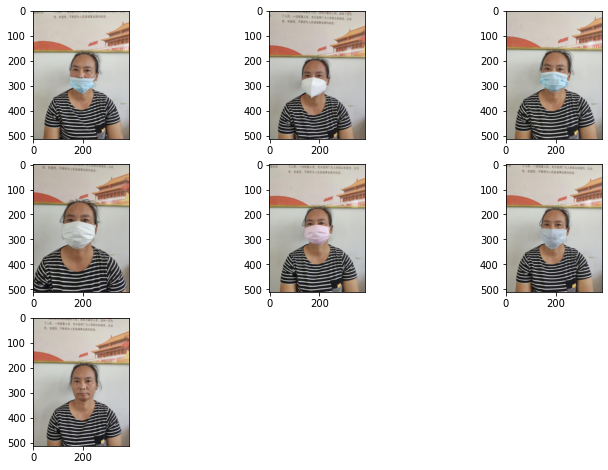

In [35]:
folder_path = [f for f in os.listdir(TRAIN_IMAGE_PATH) if not f.startswith('.')] 
files = ['incorrect_mask.jpg','mask1.jpg','mask2.jpg','mask3.jpg','mask4.jpg','mask5.jpg','normal.jpg']
fig = plt.figure(figsize=(12,8))

for idx, file in enumerate(files):
    plt.subplot(3,3,idx+1)
    image = os.path.join(TRAIN_IMAGE_PATH+folder_path[0],file)
    image = img.imread(image)
    plt.imshow(image)
plt.show()

In [36]:
import pandas as pd

origin_data = pd.read_csv(TRAIN_CSV_PATH)
label = pd.DataFrame(columns=['path','id','fname', 'label'])

for idx in range(len(origin_data)):
    age = int(origin_data['age'].loc[idx])
    gender = origin_data['gender'].loc[idx]
    file_name = [f for f in os.listdir(TRAIN_IMAGE_PATH+origin_data['path'].loc[idx]) if not f.startswith('.')]
#     print(file_name)
    
    if gender == 'male':
        if age < 30:
            for fname in file_name:
                if fname.startswith('incorrect'):
                    incorrect = {
                                 'path':TRAIN_IMAGE_PATH+origin_data['path'].loc[idx]+'/'+fname,
                                 'id' : origin_data['path'].loc[idx],
                                 'fname' : fname,
                                 'label':'6'
                    }
                    label = label.append(incorrect,ignore_index=True)
                elif fname.startswith('normal'):
                    normal =    {
                             'path':TRAIN_IMAGE_PATH+origin_data['path'].loc[idx]+'/'+fname,
                             'id' : origin_data['path'].loc[idx],
                             'fname' : fname,
                             'label':'12'
                            }
                    label = label.append(normal,ignore_index=True)
                else:
                    mask =  {
                        'path':TRAIN_IMAGE_PATH+origin_data['path'].loc[idx]+'/'+fname,
                        'id' : origin_data['path'].loc[idx],
                        'fname' : fname,
                        'label':'0'
                    }
                    label = label.append(mask,ignore_index=True)
        elif age >= 60:
            for fname in file_name:
                if fname.startswith('incorrect'):
                    incorrect = {
                
                                 'path':TRAIN_IMAGE_PATH+origin_data['path'].loc[idx]+'/'+fname,
                                 'id' : origin_data['path'].loc[idx],
                                 'fname' : fname,
                                 'label':'8'
                    }
                    label = label.append(incorrect,ignore_index=True)
                elif fname.startswith('normal'):
                    normal =    {
                             'path':TRAIN_IMAGE_PATH+origin_data['path'].loc[idx]+'/'+fname,
                             'id' : origin_data['path'].loc[idx],
                             'fname' : fname,
                             'label':'14'
                    }
                    label = label.append(normal,ignore_index=True)
                else:
                    mask =  {
                        'path':TRAIN_IMAGE_PATH+origin_data['path'].loc[idx]+'/'+fname,
                        'id' : origin_data['path'].loc[idx],
                        'fname' : fname,
                        'label':'2'
                    }
                    label = label.append(mask,ignore_index=True)
        else: # >=30 and <60
            for fname in file_name:
                if fname.startswith('incorrect'):
                    incorrect = {
                                 'path':TRAIN_IMAGE_PATH+origin_data['path'].loc[idx]+'/'+fname,
                                 'id' : origin_data['path'].loc[idx],
                                 'fname' : fname,
                                 'label':'7'
                    }
                    label = label.append(incorrect,ignore_index=True)
                elif fname.startswith('normal'):
                    normal =    {
                             'path':TRAIN_IMAGE_PATH+origin_data['path'].loc[idx]+'/'+fname,
                             'id' : origin_data['path'].loc[idx],
                             'fname' : fname,
                             'label':'13'
                
                    }
                    label = label.append(normal,ignore_index=True)
                else:
                    mask =  {
                        'path':TRAIN_IMAGE_PATH+origin_data['path'].loc[idx]+'/'+fname,
                        'id' : origin_data['path'].loc[idx],
                        'fname' : fname,
                        'label':'1'
                    }
                    label = label.append(mask,ignore_index=True)        
    elif gender == 'female':
        if age < 30:
            for fname in file_name:
                if fname.startswith('incorrect'):
                    incorrect = {
                                 'path':TRAIN_IMAGE_PATH+origin_data['path'].loc[idx]+'/'+fname,
                                 'id' : origin_data['path'].loc[idx],
                                 'fname' : fname,
                                 'label':'9'
                    }
                    label = label.append(incorrect,ignore_index=True)
                elif fname.startswith('normal'):
                    normal =    {
                             'path':TRAIN_IMAGE_PATH+origin_data['path'].loc[idx]+'/'+fname,
                             'id' : origin_data['path'].loc[idx],
                             'fname' : fname,
                             'label':'15'
                    }
                    label = label.append(normal,ignore_index=True)
                else:
                    mask =  {
                        'path':TRAIN_IMAGE_PATH+origin_data['path'].loc[idx]+'/'+fname,
                        'id' : origin_data['path'].loc[idx],
                        'fname' : fname,
                        'label':'3'
                    }
                    label = label.append(mask,ignore_index=True)
        elif age >= 60:
            for fname in file_name:
                
                if fname.startswith('incorrect'):
                    incorrect = {
                
                                 'path':TRAIN_IMAGE_PATH+origin_data['path'].loc[idx]+'/'+fname,
                                 'id' : origin_data['path'].loc[idx],
                                 'fname' : fname,
                                 'label':'11'
                    }
                    label = label.append(incorrect,ignore_index=True)
            
                elif fname.startswith('normal'):
                    normal =    {
                             'path':TRAIN_IMAGE_PATH+origin_data['path'].loc[idx]+'/'+fname,
                             'id' : origin_data['path'].loc[idx],
                             'fname' : fname,
                             'label':'17'
                    }
                    label = label.append(normal,ignore_index=True)
                else:
                    mask =  {
                        'path':TRAIN_IMAGE_PATH+origin_data['path'].loc[idx]+'/'+fname,
                        'id' : origin_data['path'].loc[idx],
                        'fname' : fname,
                        'label':'5'
                    }
                    label = label.append(mask,ignore_index=True)
        else: # >=30 and <60
            for fname in file_name:
                if fname.startswith('incorrect'):
                    incorrect = {
                                 'path': TRAIN_IMAGE_PATH+origin_data['path'].loc[idx]+'/'+fname,
                                 'id' : origin_data['path'].loc[idx],
                                 'fname' : fname,
                                 'label':'10'
                    }
                    label = label.append(incorrect,ignore_index=True)
                elif fname.startswith('normal'):
                    normal =    {
                             'path':TRAIN_IMAGE_PATH+origin_data['path'].loc[idx]+'/'+fname,
                             'id' : origin_data['path'].loc[idx],
                             'fname' : fname,
                             'label':'16'
                    }
                    label = label.append(normal,ignore_index=True)
                else:
                    mask =  {
                        'path':TRAIN_IMAGE_PATH+origin_data['path'].loc[idx]+'/'+fname,
                        'id' : origin_data['path'].loc[idx],
                        'fname' : fname,
                        'label':'4'
                    }
                    label = label.append(mask,ignore_index=True)
label.to_csv('../input/data/train/label.csv',index=False)

In [37]:
# 라벨별 폴더 만들기 - if already made, do not have to run the code 
for split in ['train/','val/']:
    for class_num in range(18):
        os.makedirs('../input/data/train/dataset/'+split+str(class_num))

In [38]:
for idx in range(18):
    target = label[label['label'] == str(idx)]
    
    cnt = int(len(target) * 0.8)
    train = target[:cnt]
    val = target[cnt:]

    for i in range(len(train)):
        path =  train.iloc[i]['path']
        id = train.iloc[i]['id']
        fname = train.iloc[i]['fname']
        os.replace(path,'../input/data/train/dataset/train/'+str(idx)+'/'+id+'_'+fname)
        
    
    for i in range(len(val)):
        path =  val.iloc[i]['path']
        id = val.iloc[i]['id']
        fname = val.iloc[i]['fname']
        os.replace(path,'../input/data/train/dataset/val/'+str(idx)+'/'+id+'_'+fname)    